# Data Bootcamp:  Demography

We love demography, specifically the dynamics of population growth and decline.  You can drill down seemingly without end, as this [terrific graphic](http://www.bloomberg.com/graphics/dataview/how-americans-die/) about causes of death suggests.    

We take a look here at the UN's [population data](http://esa.un.org/unpd/wpp/Download/Standard/Population/):  the age distribution of the population, life expectancy, fertility (the word we use for births), and mortality (deaths).  Explore the website, it's filled with interesting data.  There are other sources that cover longer time periods, and for some countries you can get detailed data on specific things (causes of death, for example).  

We use a number of countries as examples, but Japan and China are the most striking.  The code is written so that the country is easily changed.  

This IPython notebook was created by Dave Backus, Chase Coleman, and Spencer Lyon for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

## Preliminaries

Import statements and a date check for future reference.   

In [2]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import matplotlib as mpl              # graphics parameters
import numpy as np                    # numerical calculations 

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2016-03-23
What version of Python are we running? 
3.5.1 |Anaconda 2.5.0 (64-bit)| (default, Jan 29 2016, 15:01:46) [MSC v.1900 64 bit (AMD64)]


## Population by age 

We have both "estimates" of the past (1950-2015) and "projections" of the future (out to 2100).  Here we focus on the latter, specifically what the UN refers to as the medium variant:  their middle of the road projection.  It gives us a sense of how Japan's population might change over the next century. 

It takes a few seconds to read the data.  

What are the numbers?  Thousands of people in various 5-year age categories.  

In [19]:
url1 = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url2 = '1_Indicators%20(Standard)/EXCEL_FILES/1_Population/'
url3 = 'WPP2015_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.XLS'
url = url1 + url2 + url3 

cols = [2, 5] + list(range(6,28))
#est = pd.read_excel(url, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
prj = pd.read_excel(url, sheetname=1, skiprows=16, parse_cols=cols, na_values=['…'])

prj.head(3)[list(range(6))]

,"Major area, region, country or area *",Reference date (as of 1 July),0-4,5-9,10-14,15-19
0,WORLD,2015,670928.185,637448.895,607431.299,590069.337
1,WORLD,2020,677599.590,664282.610,634568.409,604322.921
2,WORLD,2025,673174.914,671929.973,661684.410,631509.113


In [29]:
# rename some variables 
pop = prj 
names = list(pop)
pop = pop.rename(columns={names[0]: 'Country', 
                          names[1]: 'Year'}) 
# select country and years 
country = ['China']
years     = [2015, 2055, 2095]
pop = pop[pop['Country'].isin(country) & pop['Year'].isin(years)]
pop = pop.drop(['Country'], axis=1)

# set index = Year 
# divide by 1000 to convert numbers from thousands to millions
pop = pop.set_index('Year')/1000

pop.head()[list(range(8))]

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39
Year,,,,,,,,
2015,83.185944,78.637404,75.291908,78.930129,106.138612,129.085568,99.374546,95.219098
2055,56.519466,59.335583,61.081359,61.407906,60.851659,61.738809,67.244138,76.723836
2095,44.793356,46.169667,47.923969,49.429843,50.132093,50.209740,50.482893,52.084554


In [30]:
# transpose (T) so that index = age 
pop = pop.T
pop.head(3)

Year,2015,2055,2095
0-4,83.185944,56.519466,44.793356
5-9,78.637404,59.335583,46.169667
10-14,75.291908,61.081359,47.923969


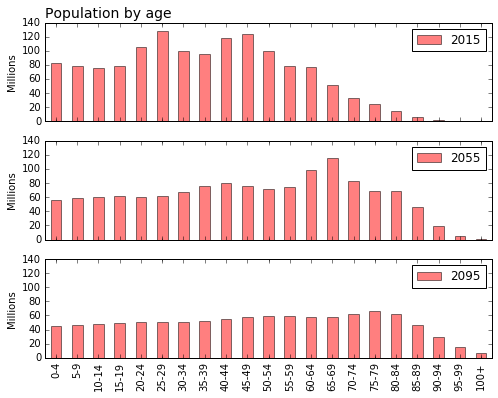

In [31]:
ax = pop.plot(kind='bar',  
              color='red', 
              alpha=0.5, subplots=True, sharey=True, figsize=(8,6))

for axnum in range(len(ax)):  
    ax[axnum].set_title('')
    ax[axnum].set_ylabel('Millions')
        
ax[0].set_title('Population by age', fontsize=14, loc='left')   

**Exercise.** What do you see here?  What else would you like to know?  

**Exercise.** Adapt the preceeding code to do the same thing for China.  Or some other country that sparks your interest.  

## Fertility:  aka birth rates

We might wonder, why is the population falling in Japan?  Other countries?  Well, one reason is that birth rates are falling.  Demographers call this fertility.  Here we look at the fertility using the same [UN source](http://esa.un.org/unpd/wpp/Download/Standard/Fertility/) as the previous example.  We look at two variables:  total fertility and fertility by age of mother.  In both cases we explore the numbers to date, but the same files contain projections of future fertility.  

In [32]:
# fertility overall 
uft  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
uft += '1_Indicators%20(Standard)/EXCEL_FILES/'
uft += '2_Fertility/WPP2015_FERT_F04_TOTAL_FERTILITY.XLS'

cols = [2] + list(range(5,18))
ftot = pd.read_excel(uft, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])

ftot.head(3)[list(range(6))]

,"Major area, region, country or area *",1950-1955,1955-1960,1960-1965,1965-1970,1970-1975
0,WORLD,4.961571,4.898665,5.024379,4.922202,4.475478
1,More developed regions,2.823786,2.807368,2.685900,2.387534,2.150816
2,Less developed regions,6.075417,5.941033,6.129418,6.034843,5.416602


In [35]:
# rename some variables 
names = list(ftot)
f = ftot.rename(columns={names[0]: 'Country'}) 

# select countries 
countries = ['China', 'Japan', 'Germany', 'United States of America', "Canada", "Italy"]
f = f[f['Country'].isin(countries)]

# shape
f = f.set_index('Country').T 
f = f.rename(columns={'United States of America': 'United States'})
f.tail(3)

Country,China,Japan,Italy,Germany,Canada,United States
2000-2005,1.50,1.2980,1.2974,1.3513,1.516,2.0420
2005-2010,1.53,1.3388,1.4169,1.3623,1.636,2.0590
2010-2015,1.55,1.3960,1.4275,1.3909,1.610,1.8902


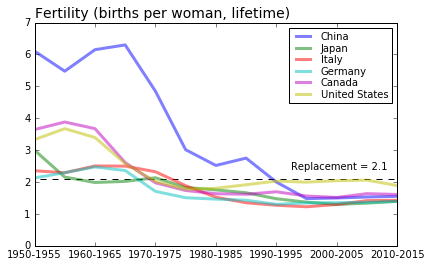

In [36]:
fig, ax = plt.subplots()
f.plot(ax=ax, kind='line', alpha=0.5, lw=3, figsize=(6.5, 4))
ax.set_title('Fertility (births per woman, lifetime)', fontsize=14, loc='left')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_ylim(ymin=0)
ax.hlines(2.1, -1, 13, linestyles='dashed')
ax.text(8.5, 2.4, 'Replacement = 2.1')

**Exercise.** What do you see here?  What else would you like to know?  

**Exercise.** Add Canada to the figure.  How does it compare to the others?  What other countries would you be interested in?

## Life expectancy 

One of the bottom line summary numbers for mortality is life expectancy:  if mortaility rates fall, people live longer, on average.  Here we look at life expectancy at birth.  There are also numbers for life expectancy given than you live to some specific age; for example, life expectancy given that you survive to age 60. 

In [37]:
# life expectancy at birth, both sexes  
ule  = 'http://esa.un.org/unpd/wpp/DVD/Files/1_Indicators%20(Standard)/EXCEL_FILES/3_Mortality/'
ule += 'WPP2015_MORT_F07_1_LIFE_EXPECTANCY_0_BOTH_SEXES.XLS'

cols = [2] + list(range(5,34))
le  = pd.read_excel(ule, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])

le.head(3)[list(range(10))]

,"Major area, region, country or area *",1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995
0,WORLD,46.807955,49.211594,51.069722,55.378481,58.049389,60.212254,61.989053,63.610776,64.536781
1,More developed regions,64.669835,67.679537,69.440381,70.281907,71.063794,71.960446,72.806852,73.901457,74.107521
2,Less developed regions,41.508118,43.882493,46.017378,51.441078,54.770858,57.342650,59.418113,61.229860,62.453399


In [38]:
# rename some variables 
oldname = list(le)[0]
l = le.rename(columns={oldname: 'Country'}) 
l.head(3)[list(range(8))]

,Country,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985
0,WORLD,46.807955,49.211594,51.069722,55.378481,58.049389,60.212254,61.989053
1,More developed regions,64.669835,67.679537,69.440381,70.281907,71.063794,71.960446,72.806852
2,Less developed regions,41.508118,43.882493,46.017378,51.441078,54.770858,57.342650,59.418113


In [39]:
# select countries 
countries = ['China', 'Japan', 'Germany', 'United States of America']
l = l[l['Country'].isin(countries)]

# shape
l = l.set_index('Country').T 
l = l.rename(columns={'United States of America': 'United States'})
l.tail()

Country,China,Japan,Germany,United States
1990-1995,69.386,79.447,75.878,75.617
1995-2000,70.587,80.475,77.212,76.404
2000-2005,72.852,81.829,78.573,77.133
2005-2010,74.438,82.621,79.757,78.113
2010-2015,75.432,83.298,80.647,78.873


(0, 85.0)

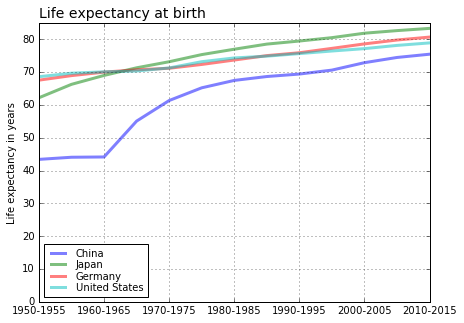

In [43]:
fig, ax = plt.subplots()
l.plot(ax=ax, kind='line', alpha=0.5, lw=3, figsize=(7, 5), grid=True)
ax.set_title('Life expectancy at birth', fontsize=14, loc='left')
ax.set_ylabel('Life expectancy in years')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_ylim(ymin=0)

**Exercise.** What other countries would you like to see?  Can you add them?  The code below generates a list.  

In [13]:
countries = le.rename(columns={oldname: 'Country'})['Country']

**Exercise.**  Why do you think the US is falling behind?  What would you look at to verify your conjecture?

## Mortality:  aka death rates 

Another thing that affects the age distribution of the population is the mortality rate:  if mortality rates fall people live longer, on average.  Here we look at how mortality rates have changed over the past 60+ years.  Roughly speaking, people live an extra five years every generation.  Which is a lot.  Some of you will live to be a hundred.  (Look at the 100+ agen category over time for Japan.)  

The experts look at mortality rates by age.  The UN has a [whole page](http://esa.un.org/unpd/wpp/Download/Standard/Mortality/) devoted to mortality numbers.  We take 5-year mortality rates from the Abridged Life Table.  

The numbers are percentages of people in a given age group who die over a 5-year period.  0.1 means that 90 percent of an age group is still alive in five years.  

In [44]:
# mortality overall 
url  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url += '1_Indicators%20(Standard)/EXCEL_FILES/3_Mortality/'
url += 'WPP2015_MORT_F17_1_ABRIDGED_LIFE_TABLE_BOTH_SEXES.XLS'

cols = [2, 5, 6, 7, 9]
mort = pd.read_excel(url, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
mort.tail(3)

,"Major area, region, country or area *",Period,Age (x),Age interval (n),"Probability of dying q(x,n)"
59524,Tonga,2010-2015,75,5,0.279867
59525,Tonga,2010-2015,80,5,0.397735
59526,Tonga,2010-2015,85,15,NaN


In [45]:
# change names 
names = list(mort)
m = mort.rename(columns={names[0]: 'Country', names[2]: 'Age', names[3]: 'Interval', names[4]: 'Mortality'})
m.head(3)

,Country,Period,Age,Interval,Mortality
0,WORLD,1950-1955,0,1,0.141804
1,WORLD,1950-1955,1,4,0.085487
2,WORLD,1950-1955,5,5,0.031513


**Comment.** At this point, we need to pivot the data.  That's not something we've done before, so take it as simply something we can do easily if we have to.  We're going to do this twice to produce different graphs:    

* Compare countries for the same period.  
* Compare different periods for the same country.  

In [55]:
# compare countries for most recent period
countries = ['China', 'Japan', 'Germany', 'United States of America']
mt = m[m['Country'].isin(countries) & m['Interval'].isin([5]) & m['Period'].isin(['2010-2015'])] 
print('Dimensions:', mt.shape) 

mp = mt.pivot(index='Age', columns='Country', values='Mortality')  
mp.head(3)

Dimensions: (64, 5)


Country,China,Germany,Japan,United States of America
Age,,,,
5,0.001756,0.000397,0.000462,0.000597
10,0.001286,0.000456,0.000437,0.000714
15,0.001844,0.001300,0.001141,0.002264


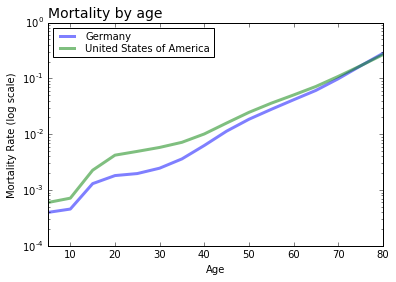

In [57]:
fig, ax = plt.subplots()
mp[["Germany", "United States of America"]].plot(ax=ax, kind='line', alpha=0.5, linewidth=3, 
       logy=True, 
        figsize=(6, 4))
ax.set_title('Mortality by age', fontsize=14, loc='left')
ax.set_ylabel('Mortality Rate (log scale)')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)

**Exercises.**

* What country's old people have the lowest mortality?
* What do you see here for the US?  Why is our life expectancy shorter?
* What other countries would you like to see?  Can you adapt the code to show them?  
* Anything else cross your mind?  

In [51]:
# compare periods for the one country -- countries[0] is China 
mt = m[m['Country'].isin([countries[3]]) & m['Interval'].isin([5])] 
print('Dimensions:', mt.shape) 

mp = mt.pivot(index='Age', columns='Period', values='Mortality')  
mp = mp[[0, 6, 12]]
mp.head(3)

Dimensions: (208, 5)


Period,1950-1955,1980-1985,2010-2015
Age,,,
5,0.002891,0.001401,0.000597
10,0.002730,0.001442,0.000714
15,0.005378,0.004337,0.002264


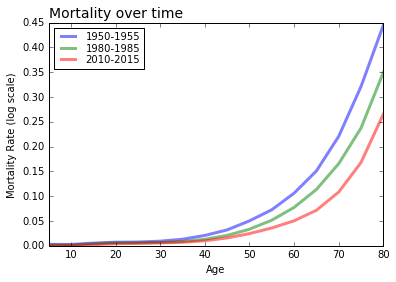

In [52]:
fig, ax = plt.subplots()
mp.plot(ax=ax, kind='line', alpha=0.5, linewidth=3, 
#        logy=True, 
        figsize=(6, 4))
ax.set_title('Mortality over time', fontsize=14, loc='left')
ax.set_ylabel('Mortality Rate (log scale)')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)

**Exercise.**  What do you see?  What else would you like to know?  

**Exercise.** Repeat this graph for the United States?  How does it compare?